### Group: 5 
#### Members

1. *Name:* Vaibhav Sharma  
   *ID:* 9053188  

2. *Name:* Abdur Rahman  Shaik  
   *ID:* 8941778  

3. *Name:* Ponnu Peter  
   *ID:* 9058740
  

### Objective: <span style="color:green">Predict Heart Attack Risks and Identify Key Contributing Factors</span>

This leads us to a question: **"What increases heart attack risks?"**

While it may encourage exploration, it fails to specify critical factors such as **age group**, **gender**, or **lifestyle habits**, which can result in overly general or even misleading conclusions. For instance, without clarification, one might assume that **cholesterol levels impact heart attack risks equally across all age groups**, overlooking that younger individuals may have different primary risk factors, such as **stress** or **lifestyle choices**. Thus, leaving such questions undefined can lead to challenges in the analysis.

A more focused question, such as:  
**"How does smoking influence heart attack risk in individuals aged 20–60?"**  
provides clearer direction and actionable insights. This enables us to **statistically represent and visualize** these factors to guide **health interventions** effectively.


### Import necessary libraries

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


### Load dataset


In [76]:
df = pd.read_csv('heart_attack_predictions.csv',nrows=100)

#### Data Cleaning

In [86]:
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)


Missing values per column:
 Country                     0
Age                         0
Gender                      0
Cholesterol_Level           0
Blood_Pressure              0
Smoking_History             0
Alcohol_Consumption         0
Physical_Activity           0
Obesity                     0
Diabetes                    0
Family_History              0
Stress_Levels               0
Dietary_Habits              0
Heart_Attack_History        0
Chest_Pain                  0
Exercise_Induced_Angina     0
Resting_ECG                 0
Max_Heart_Rate_Achieved     0
Thalassemia                 0
HDL_Cholesterol             0
LDL_Cholesterol             0
Triglycerides               0
Heart_Disease_Risk          0
Medication_Adherence        0
Urbanization_Level          0
Air_Pollution_Exposure      0
Access_To_Healthcare        0
Education_Level            26
Income_Level                0
Heart_Attack_Outcome        0
dtype: int64


### Inspect the dataset


In [46]:
print(df.info()) # Checks the structure, completeness (missing values), and data types of the DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  100 non-null    object 
 1   Age                      100 non-null    int64  
 2   Gender                   100 non-null    object 
 3   Cholesterol_Level        100 non-null    float64
 4   Blood_Pressure           100 non-null    float64
 5   Smoking_History          100 non-null    object 
 6   Alcohol_Consumption      100 non-null    float64
 7   Physical_Activity        100 non-null    object 
 8   Obesity                  100 non-null    object 
 9   Diabetes                 100 non-null    object 
 10  Family_History           100 non-null    object 
 11  Stress_Levels            100 non-null    float64
 12  Dietary_Habits           100 non-null    object 
 13  Heart_Attack_History     100 non-null    object 
 14  Chest_Pain               10

In [47]:
pd.set_option('display.max_columns', None)
df.head() #This method retrieves the first 5 rows (or a specified number) of the DataFrame.

,Country,Age,Gender,Cholesterol_Level,Blood_Pressure,Smoking_History,Alcohol_Consumption,Physical_Activity,Obesity,Diabetes,Family_History,Stress_Levels,Dietary_Habits,Heart_Attack_History,Chest_Pain,Exercise_Induced_Angina,Resting_ECG,Max_Heart_Rate_Achieved,Thalassemia,HDL_Cholesterol,LDL_Cholesterol,Triglycerides,Heart_Disease_Risk,Medication_Adherence,Urbanization_Level,Air_Pollution_Exposure,Access_To_Healthcare,Education_Level,Income_Level,Heart_Attack_Outcome
0,Germany,39,Male,210.091036,173.301650,Never,0.531933,Active,No,No,Yes,3.559035,Healthy,Yes,Yes,Yes,Abnormal,170,Reversible Defect,96.545522,68.333573,165.060897,Medium,No,Urban,51.988416,Good,Tertiary,Low,Died
1,Egypt,88,Male,163.998730,137.381678,Former,5.626668,Sedentary,Yes,Yes,No,6.193047,Moderate,Yes,No,Yes,Normal,155,Reversible Defect,92.524644,98.194015,452.124651,Medium,No,Suburban,97.739896,Good,NaN,Low,Died
2,Spain,60,Female,263.502590,139.737677,Former,0.928015,Active,No,Yes,No,4.964536,Moderate,Yes,No,Yes,Normal,114,Normal,71.541637,118.767677,171.432620,Low,No,Urban,60.352793,Poor,Tertiary,Low,Survived
3,Canada,25,Female,292.003927,85.992807,Former,7.374519,Active,No,Yes,Yes,4.141370,Moderate,Yes,Yes,No,Abnormal,123,Normal,41.990850,190.190597,329.553258,Medium,No,Urban,14.397347,Good,Secondary,High,Survived
4,France,54,Female,267.736563,119.882856,Former,4.317845,Sedentary,Yes,No,No,9.957839,Unhealthy,No,Yes,Yes,Abnormal,195,Reversible Defect,82.890209,188.209372,449.953074,High,Yes,Rural,69.448684,Good,NaN,Low,Died


### Applying Descriptive Statistics 

##### Mean, Median, and Mode

In [48]:
mean_age = df['Age'].mean()     #Average value for numerical variables like age .
median_age = df['Age'].median() #The middle value that splits data into two halves.
mode_age = df['Age'].mode()[0]  #The most frequently occurring value.
print("mean of age",mean_age)
print("median of age",median_age)
print("mode of age",mode_age)

mean of age 51.33
median of age 47.0
mode of age 25


##### Variance, Standard Deviation, and Quartiles

In [49]:
std_age = df['Age'].std()                              # To measure data spread.
variance_age = df['Age'].var()                         # To measure data spread.
quartiles_age = df['Age'].quantile([0.25, 0.5, 0.75, 1])  # Split data into 4 equal parts
print("Standard deviation of age",std_age)
print ("Square of std is: ", std_age * std_age)
print("Variance of age",variance_age)
print("Quartiles of age",quartiles_age)

Standard deviation of age 21.344719972561613
Square of std is:  455.5970707070706
Variance of age 455.59707070707066
Quartiles of age 0.25    34.00
0.50    47.00
0.75    68.75
1.00    89.00
Name: Age, dtype: float64


### Summarizing numerical Data

In [50]:
df['Age'].describe() # Provides a statistical summary of the numeric columns in the Data Frame.

count    100.00000
mean      51.33000
std       21.34472
min       18.00000
25%       34.00000
50%       47.00000
75%       68.75000
max       89.00000
Name: Age, dtype: float64

### Data Visualization

#### 1. Scatter Plot  ( Visualize relationships between two variables, age vs cholesterol):

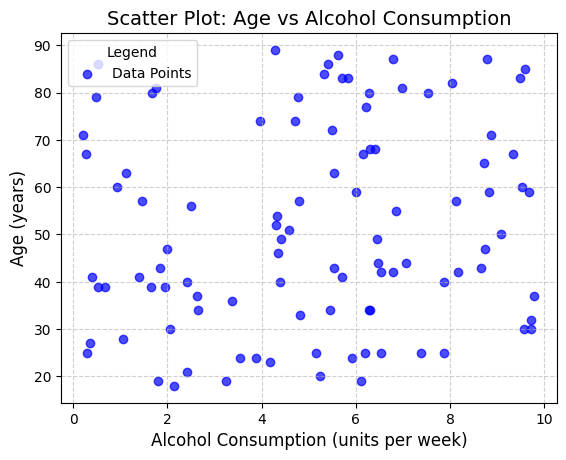

In [72]:
#plt.figure(figsize=(12, 6))  # Adjust the figure size for better visibility
plt.scatter(df['Alcohol_Consumption'], df['Age'], label='Data Points', color='blue', alpha=0.7)
plt.title("Scatter Plot: Age vs Alcohol Consumption", fontsize=14)
plt.xlabel("Alcohol Consumption (units per week)", fontsize=12)
plt.ylabel("Age (years)", fontsize=12)
plt.legend(title="Legend", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()



#### 2. Histogram (Display the frequency distribution of a variable)

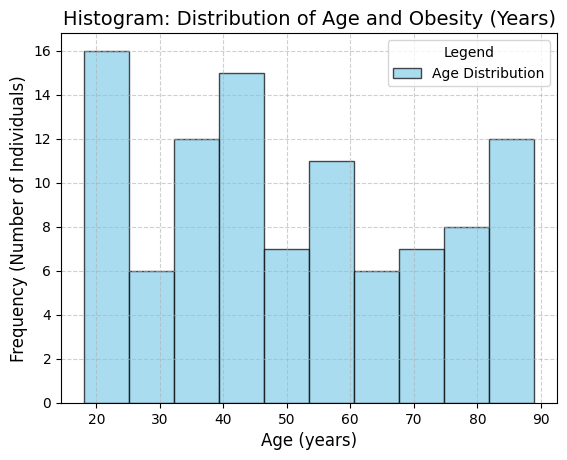

In [71]:
# Enhanced histogram with units and descriptive labels
#plt.figure(figsize=(12, 6))  # Adjust the figure size for better visibility
df['Age'].hist(bins=10, color='skyblue', alpha=0.7, edgecolor='black', label='Age Distribution')
plt.title("Histogram: Distribution of Age and Obesity (Years)", fontsize=14)
plt.xlabel("Age (years)", fontsize=12)  # Include units in the x-axis
plt.ylabel("Frequency (Number of Individuals)", fontsize=12)  # Updated ylabel
plt.legend(title="Legend", fontsize=10)  # Adding a legend for clarity
plt.grid(True, linestyle='--', alpha=0.6)  # Adding grid for better readability
plt.show()

#### 3. Box-Whisker Plot (Show data spread and identify outliers)

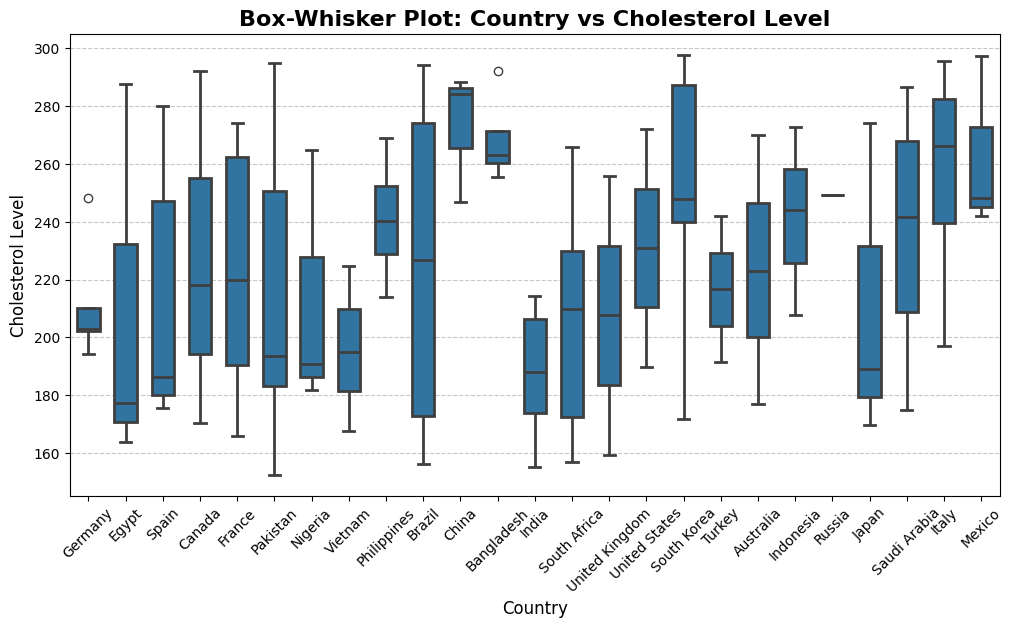

In [87]:


plt.figure(figsize=(12, 6))  # Adjust the figure size for better visibility
sns.boxplot(
    data=df, 
    x='Country', 
    y='Cholesterol_Level', 
    width=0.6,           # Adjust the box width
    linewidth=2          # Thicker lines for better clarity
)



# Add titles and labels with custom font sizes
plt.title("Box-Whisker Plot: Country vs Cholesterol Level", fontsize=16, fontweight='bold')
plt.xlabel("Country", fontsize=12)
plt.ylabel("Cholesterol Level", fontsize=12)

# Rotate x-axis labels and adjust font size
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

#### Histogram and density plot

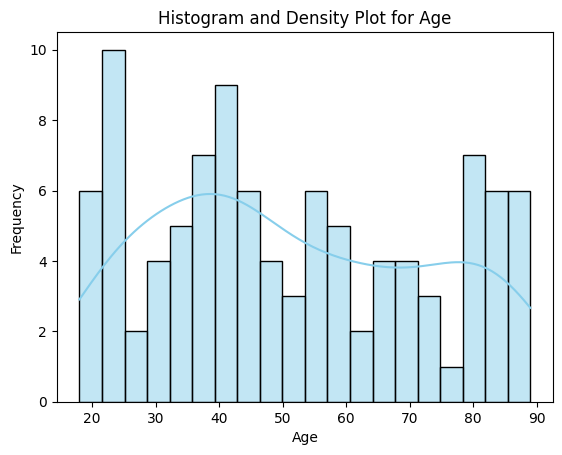

In [69]:
sns.histplot(df['Age'], kde=True, bins=20, color='skyblue')
plt.title('Histogram and Density Plot for Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#### Q-Q Plot 

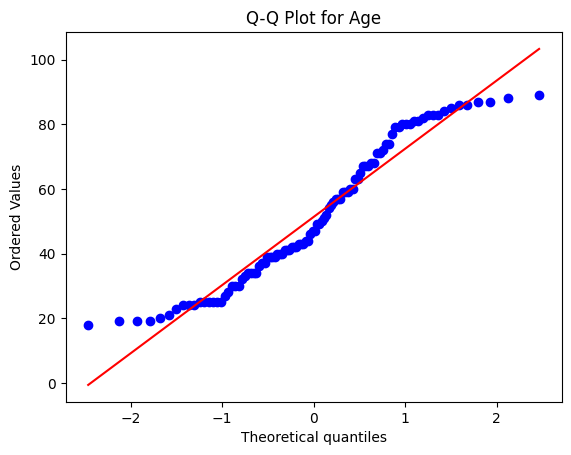

In [ ]:
# Q-Q Plot for 'Age'

stats.probplot(df['Age'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Age')
plt.show()

#### Shapiro-Wilk Test for Normality

In [56]:
from scipy.stats import shapiro

# Example for 'Age' feature
stat, p = shapiro(df['Age'])

print(f"Shapiro-Wilk Test for 'Age':")
print(f"Test Statistic: {stat}")
print(f"P-value: {p}")

if p > 0.05:
    print("The 'Age' appears to be normally distributed")
else:
    print("The 'Age' is not normally distributed")

Shapiro-Wilk Test for 'Age':
Test Statistic: 0.9382967652186474
P-value: 0.0001520071229287052
The 'Age' is not normally distributed
